<h2>Twitter Sentiment Analysis With Scikit-Learn</h2>
<p>In this lesson we will use the scikit-learn Python library to perform some natural language processing tasks on our Twitter #climatechange dataset to evaluate user sentiment within the  280 character chunk of tweet text. For a supervised learning task, one must specify training and test datasets. For this example, we will use Textblob's built-in sentiment analysis to generate the core of our training and test datasets. </p>
<p>This process consists of running the Textblob polarity sentiment analysis on the tweet text from our #climatechange dataset and extract a subset of the most positive or negative tweet text and create two datasets large enough to give us reasonable results but small enough to process quickly. </p>
<p>We needed a reasonably large sample size so we chose tweets for the positive dataset which had polarity sentiment values greater than 0.6 and tweets in the negative dataset which had polarity sentiment less than 0.4.</p>
<p>We then filtered the data to remove end-of-line characters, special characters, multiple sequential spaces, single character words, etc. 


<h2>Import Packages</h2>

In [1]:
import re
#import datetime
#import os
#import sys
#import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from textblob import TextBlob
#import sklearn
   

## Import #climatechange Dataset

In [2]:
data_dir = '../data/twitter/'

In [3]:
df = pd.read_csv(data_dir + 'climatechange_tweets_all.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457294 entries, 0 to 457293
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   tweet_id                  457294 non-null  int64  
 1   tweet_created_at          457294 non-null  object 
 2   language                  457294 non-null  object 
 3   user_screen_name          457294 non-null  object 
 4   user_created_at           457294 non-null  object 
 5   user_id                   457294 non-null  int64  
 6   followers_count           457294 non-null  int64  
 7   friends_count             457294 non-null  int64  
 8   time_zone                 0 non-null       float64
 9   utc_offset                0 non-null       float64
 10  retweeted_status          457294 non-null  int64  
 11  retweet_id                457294 non-null  object 
 12  retweet_user_screen_name  457294 non-null  object 
 13  retweet_user_id           457294 non-null  o

## Create a Filtered Training/Test Dataset of Polarity Sentiment Measure Using Textblob

In order to carry out classification, one needs to have labeled data examples: a set of inputs, along with associated labels, so that a classification algorithm can learn how to disciminate among the different labels based on the input. 

<p>Creating a training/test dataset can require a significant amount of time. Often crowd-sourcing is used for this purpose. Since this is just a tutorial based on 'low-stakes' examples, we will use a simpler and quicker method to create our training/test dataset with Textblob. Textblob provides a feature designed to perform sentiment analysis for two different measures of sentiment, polarity and subjectivity. In this example we will use polarity, i.e. the negative or positive nature of a text sample, to classify our #climatechange dataset into mostly positive and mostly negative datasets. </p>

<p>In the next code cell, we filter the data in several ways before processing with TextBlob. </p>

In [5]:
dff = df.drop_duplicates(subset='retweet_id')[['retweet_id', 'text']]
count = 0
for idx, row in dff.iterrows():
    # Remove end-of-line characters
    tweet_text = re.sub('\n','',row['text'])
    # Remove special characters
    tweet_text = re.sub(r'\W', ' ', tweet_text)
    # remove all single characters
    tweet_text = re.sub(r'\s+[a-zA-Z]\s+', ' ', tweet_text)
    # Remove single characters from the start
    tweet_text = re.sub(r'\^[a-zA-Z]\s+', ' ', tweet_text) 
    # Substituting multiple spaces with single space
    tweet_text = re.sub(r'\s+', ' ', tweet_text, flags=re.I)
    # Removing prefixed 'b'
    tweet_text = re.sub(r'^b\s+', '', tweet_text)
    # Converting to Lowercase
    tweet_text = tweet_text.lower()
    # Calculate the Sentiment with TextBlob
    tweet_text_sentiment = TextBlob(tweet_text)
    #
    dff.loc[idx, 'tweet_text'] = tweet_text
    dff.loc[idx, 'polarity'] = tweet_text_sentiment.sentiment.polarity
    dff.loc[idx, 'subjectivity'] = tweet_text_sentiment.sentiment.subjectivity
    #
    count += 1
    if count%10000 == 0:
        print(count)

dff.drop('text', axis=1, inplace=True)

10000
20000
30000
40000


In [6]:
print(dff.info())
dff.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44127 entries, 0 to 457223
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   retweet_id    44127 non-null  object 
 1   tweet_text    44127 non-null  object 
 2   polarity      44127 non-null  float64
 3   subjectivity  44127 non-null  float64
dtypes: float64(2), object(2)
memory usage: 2.7+ MB
None


,retweet_id,tweet_text,polarity,subjectivity
0,1068067040882233344,rt unfccc delegates from around the world are ...,0.000000,0.000000
1,1068210734977490944,rt saskboy think we most often hear the word d...,-0.066667,0.466667
2,1068223231264505857,rt ecosensenow it mat not be obvious but einst...,0.000000,0.500000
3,1068181567510626310,rt climatecomms most americans now see climate...,-0.277778,0.722222
4,1068187254768590848,rt portlandbem last week federal climate chang...,0.000000,0.322222


<Axes: ylabel='Frequency'>

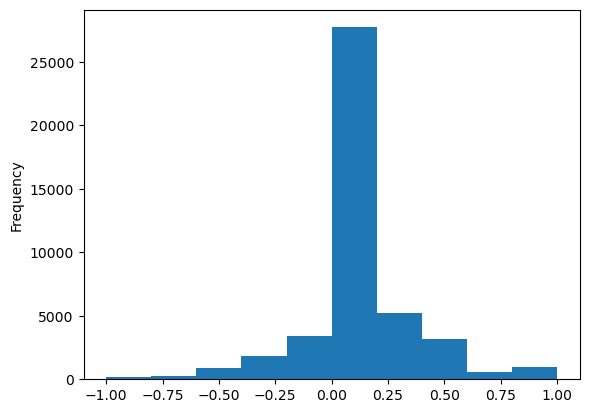

In [7]:
dff['polarity'].plot.hist()

In [8]:
dff['polarity_label'] = dff['polarity'].apply(
    lambda x: 'positive' if x > 0.5 else ('negative' if x < -0.3 else 'neutral'))

<Axes: ylabel='Frequency'>

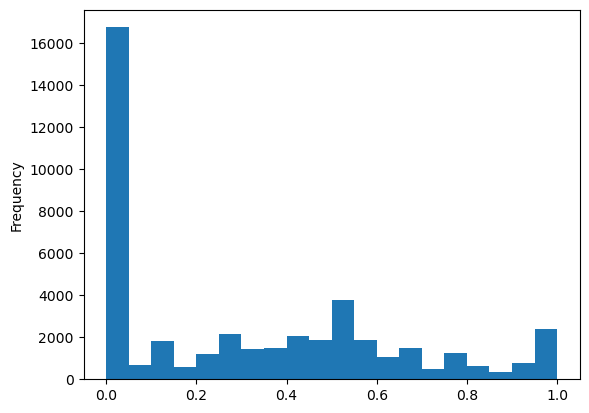

In [9]:
dff['subjectivity'].plot.hist(bins=20)

In [10]:
dff['subjectivity_label'] = dff['subjectivity'].apply(
    lambda x: 'subjective' if x > 0.9 else ('objective' if x < 0.02 else 'neither'))

In [11]:
dff.head()

,retweet_id,tweet_text,polarity,subjectivity,polarity_label,subjectivity_label
0,1068067040882233344,rt unfccc delegates from around the world are ...,0.000000,0.000000,neutral,objective
1,1068210734977490944,rt saskboy think we most often hear the word d...,-0.066667,0.466667,neutral,neither
2,1068223231264505857,rt ecosensenow it mat not be obvious but einst...,0.000000,0.500000,neutral,neither
3,1068181567510626310,rt climatecomms most americans now see climate...,-0.277778,0.722222,neutral,neither
4,1068187254768590848,rt portlandbem last week federal climate chang...,0.000000,0.322222,neutral,neither


## Building a Classifier

Now that we have created our datasets we can proceed to create a classifier, the aim of which is to take as input a given tweet text and to assign a label as to its likely sentiment (positive, negative, or neutral).

In order to proceed, we need to initialize a vectorizer. This converts the tweet text into a word 'vector' in which each word becomes a 'component' of the vector and has a specific magnitude. We have not performed any preprocessing on the data or removed any stop words. We will set lowercase to False.</p>

In [12]:
from sklearn.feature_extraction.text import CountVectorizer     

vectorizer = CountVectorizer(
    analyzer = 'word',
    lowercase = False,
    max_features = 85
)

In [13]:
features = vectorizer.fit_transform(dff.tweet_text).toarray()
features.shape

(44127, 85)

As a final step, we'll split the training data to get an evaluation set through scikit-learn's built-in cross validation method. All we need to do is provide the data and assign a training percentage (in this case, 80%).

In [14]:
from sklearn.model_selection import train_test_split

X = features
y = dff.polarity_label

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=1234)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(35301, 85)
(8826, 85)
(35301,)
(8826,)


### Build a Linear Classifier

Finally, having preprocessed the data, we can build a classifier for this corpus. As mentioned before, we'll be using the Logistic Regression from scikit-learn, so we'll start there: 

In [15]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(solver='liblinear')

Once the model is initialized, we have to fit it to our specific dataset, so we use scikit-learn's `fit()` method to do so:

In [16]:
log_model = log_model.fit(X=X_train, y=y_train)

And finally, we use this classifier to label the evaluation set we created earlier:

In [17]:
y_pred = log_model.predict(X_test)

### Evaluate the Model's Accuracy

In scikit-learn, there is a function called sklearn.metrics.accuracy_score which calculates the accuracy of the model.

In [44]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.91241785633356


We can generalize our accuracy assessment through cross-validation:

In [45]:
from sklearn.model_selection import cross_validate
cross_validate(log_model, X, y, cv=5)

{'fit_time': array([0.23553896, 0.28517008, 0.28699589, 0.26599097, 0.28178978]),
 'score_time': array([0.00478315, 0.01450205, 0.00453806, 0.00440907, 0.00495911]),
 'test_score': array([0.91457059, 0.91411738, 0.91478754, 0.91433428, 0.91580737])}

Let's try some other classifiers, such as Naive Bayes. Scikit-learn offers a few variations on the Naive-Bayes classifier, Gaussian, Multinomial, and Complement. We will create and test each model and compare our results with the Logistic Regression model. 

<h2>Gaussian NB Classifier</h2>
<p>This classifier does not really make sense because it assumes the distribution of our data is gaussian, which is not likely for tweet text. But let's run it anyhow and confirm our suspicions.</p>

In [50]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb_model = gnb.fit(X=X_train, y=y_train)
y_pred = gnb_model.predict(X_test)
cross_validate(gnb_model, X, y, cv=5)

{'fit_time': array([0.03864908, 0.03769875, 0.03763795, 0.03770399, 0.03787208]),
 'score_time': array([0.00881219, 0.00849223, 0.007581  , 0.00833011, 0.00819898]),
 'test_score': array([0.27362339, 0.30364831, 0.23320113, 0.29291785, 0.34413598])}

In [51]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.2735100838431906


<h2>Multinomial NB Classifier</h2>

In [52]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb_model = mnb.fit(X=X_train, y=y_train)
y_pred = mnb_model.predict(X_test)
cross_validate(mnb_model, X, y, cv=5)

{'fit_time': array([0.05883026, 0.07261896, 0.07440066, 0.06312108, 0.06718802]),
 'score_time': array([0.00388288, 0.00398493, 0.00372815, 0.00389624, 0.00550508]),
 'test_score': array([0.91275776, 0.91321097, 0.91286119, 0.91240793, 0.91388102])}

In [53]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9110582370269658


<h2>Complement NB Classifier</h2>

In [54]:
from sklearn.naive_bayes import ComplementNB
cnb = ComplementNB()
cnb_model = cnb.fit(X=X_train, y=y_train)
y_pred = cnb_model.predict(X_test)
cross_validate(cnb_model, X, y, cv=5)

{'fit_time': array([0.07462502, 0.07923388, 0.06362534, 0.06402206, 0.07389426]),
 'score_time': array([0.00414109, 0.00384307, 0.00403881, 0.00399995, 0.0037818 ]),
 'test_score': array([0.59539995, 0.60605031, 0.6       , 0.59977337, 0.62968839])}

It appears none of the Naive Bayes classifiers performs better than Logistic Regression. 